In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

In [3]:
file = "data/food-allergy-analysis-Zenodo.csv"

allergy_df = pd.read_csv(file)
allergy_df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
allergy_df.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


Text(0, 0.5, 'AGE_START_YEARS')

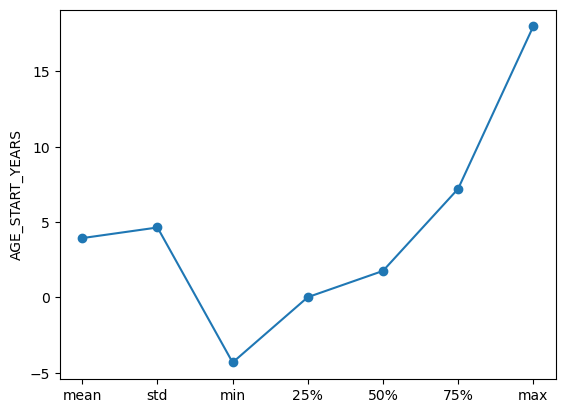

In [5]:
allergy_df.describe().drop('count')['AGE_START_YEARS'].plot(marker='o')
plt.ylabel('AGE_START_YEARS')

In [6]:
allergy_df.describe().drop('count')['AGE_START_YEARS']

mean     3.942140
std      4.646174
min     -4.312115
25%      0.021903
50%      1.763176
75%      7.208761
max     17.984942
Name: AGE_START_YEARS, dtype: float64

In [7]:
df=allergy_df[allergy_df['AGE_START_YEARS']<0]
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
29886,29887,2008,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,-0.971937,2.683094,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74892,74893,2009,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,-0.180698,3.865845,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86069,86070,2010,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,P0 - Non-Medicaid,False,-0.128679,3.258042,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.464066,3.258042,2.0
90009,90010,2010,S0 - Male,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,P0 - Non-Medicaid,False,-0.104038,3.255305,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102876,102877,2011,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,-0.027379,2.540726,NaN,...,NaN,NaN,NaN,NaN,NaN,1.002053,NaN,1.029432,2.787132,11.0


In [8]:
allergy_df.dtypes

SUBJECT_ID                   int64
BIRTH_YEAR                   int64
GENDER_FACTOR               object
RACE_FACTOR                 object
ETHNICITY_FACTOR            object
PAYER_FACTOR                object
ATOPIC_MARCH_COHORT           bool
AGE_START_YEARS            float64
AGE_END_YEARS              float64
SHELLFISH_ALG_START        float64
SHELLFISH_ALG_END          float64
FISH_ALG_START             float64
FISH_ALG_END               float64
MILK_ALG_START             float64
MILK_ALG_END               float64
SOY_ALG_START              float64
SOY_ALG_END                float64
EGG_ALG_START              float64
EGG_ALG_END                float64
WHEAT_ALG_START            float64
WHEAT_ALG_END              float64
PEANUT_ALG_START           float64
PEANUT_ALG_END             float64
SESAME_ALG_START           float64
SESAME_ALG_END             float64
TREENUT_ALG_START          float64
TREENUT_ALG_END            float64
WALNUT_ALG_START           float64
WALNUT_ALG_END      

In [9]:
allergy_df.columns


Index(['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END', 'FIRST_ASTHMARX', 'L

<AxesSubplot: >

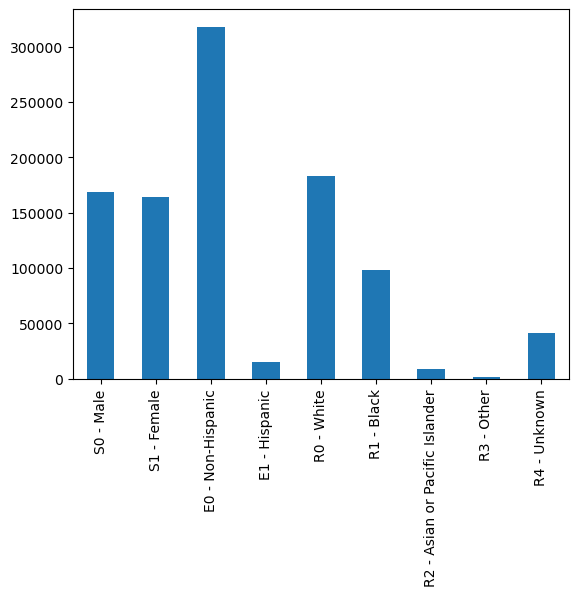

In [10]:
pd.concat([allergy_df.groupby('GENDER_FACTOR').count(),
          allergy_df.groupby('ETHNICITY_FACTOR').count(),
          allergy_df.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar")

<AxesSubplot: xlabel='GENDER_FACTOR,ETHNICITY_FACTOR'>

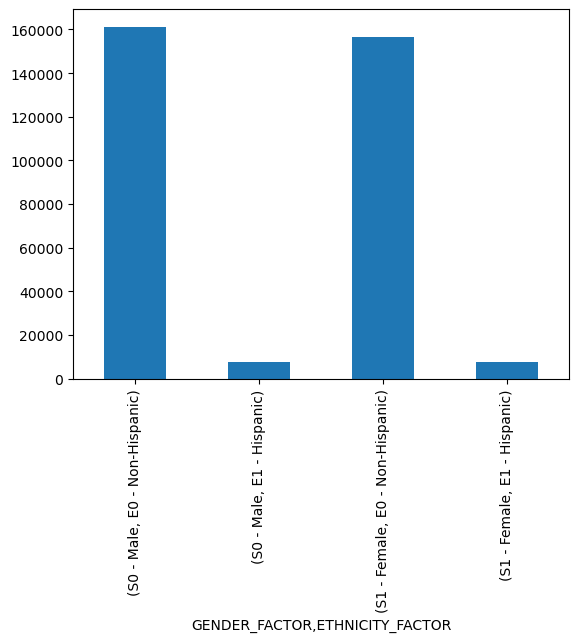

In [11]:
(allergy_df.groupby(['GENDER_FACTOR','ETHNICITY_FACTOR']).count()['RACE_FACTOR']).plot(kind="bar")

<AxesSubplot: xlabel='GENDER_FACTOR,RACE_FACTOR'>

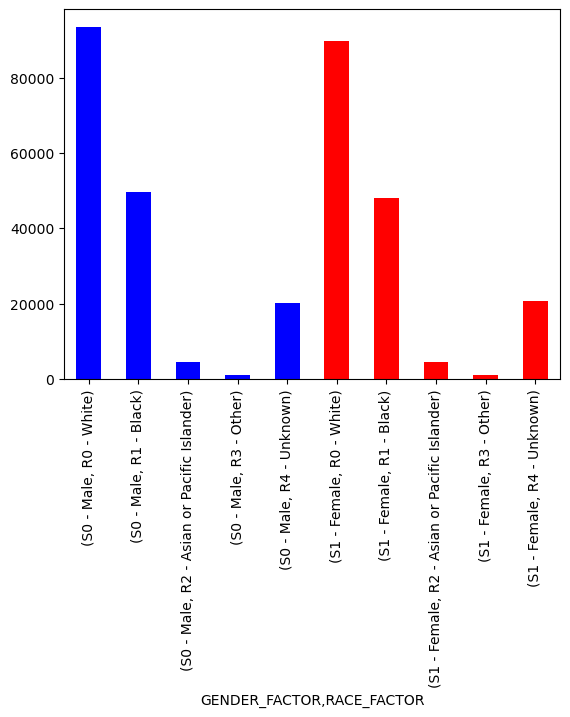

In [12]:
(allergy_df.groupby(['GENDER_FACTOR','RACE_FACTOR']).count()['ETHNICITY_FACTOR']).plot(kind="bar",color=['blue','blue','blue','blue','blue',
                                                                                                         'red','red','red','red','red','red'])

In [13]:
milk_df = allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', 'MILK_ALG_START',
       'MILK_ALG_END']].copy()
milk_df.count()

SUBJECT_ID             333200
BIRTH_YEAR             333200
GENDER_FACTOR          333200
RACE_FACTOR            333200
ETHNICITY_FACTOR       333200
PAYER_FACTOR           333200
ATOPIC_MARCH_COHORT    333200
AGE_START_YEARS        333200
AGE_END_YEARS          333200
MILK_ALG_START           7289
MILK_ALG_END             4580
dtype: int64

In [15]:
def clean_DataFrame(allergen):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    allergen_df=allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column]].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    value = allergen_df_clean[allergen_df_clean[allergen_end_column].isna()][allergen_start_column]

    #for index in value.index:
        #allergen_df_clean.iloc[index,10]=value[index]
    return allergen_df_clean


In [16]:
milk_df_clean=clean_DataFrame('milk')
milk_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,MILK_ALG_START,MILK_ALG_END
0,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,1.002053,1.002053
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.421629,5.133470,0.544832,0.544832
2,139,1999,S0 - Male,R0 - White,E0 - Non-Hispanic,P1 - Medicaid,False,7.671458,14.592745,7.671458,7.671458
3,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.016427,6.855578,0.334018,0.334018
4,214,2006,S0 - Male,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,True,0.079398,6.965092,0.123203,NaN


In [17]:
milk_df_clean.count()

SUBJECT_ID             7289
BIRTH_YEAR             7289
GENDER_FACTOR          7289
RACE_FACTOR            7289
ETHNICITY_FACTOR       7289
PAYER_FACTOR           7289
ATOPIC_MARCH_COHORT    7289
AGE_START_YEARS        7289
AGE_END_YEARS          7289
MILK_ALG_START         7289
MILK_ALG_END           4580
dtype: int64

In [25]:
#milk_scatter_df = milk_df_clean.groupby('GENDER_FACTOR')
#milk_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="MILK_ALG_START", grid=True, edgecolors="black")
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, annotate_xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values, edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    print(f"The r-vlaue is: {rvalue}")
    plt.show()

The r-vlaue is: 0.8311844806126376


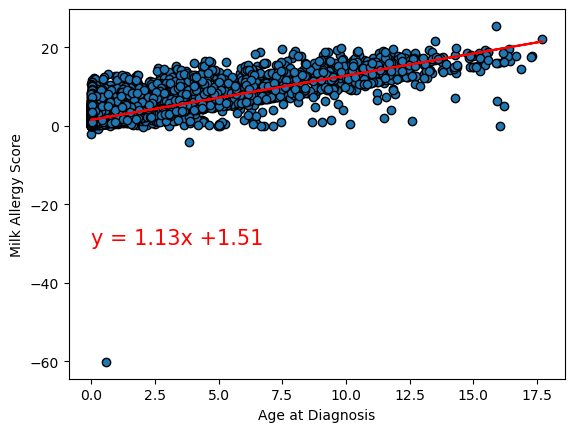

In [31]:
createLinearRegressionPlot(milk_df_clean["AGE_START_YEARS"], milk_df_clean["MILK_ALG_START"], "Age at Diagnosis", "Milk Allergy Score",(0,-30))

The r-vlaue is: -0.8139649364972544


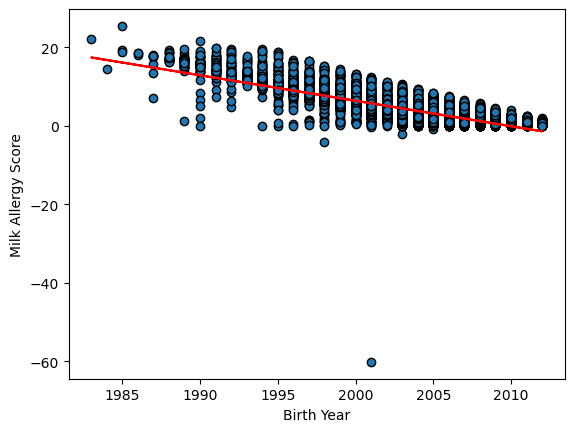

In [32]:
createLinearRegressionPlot(milk_df_clean["BIRTH_YEAR"], milk_df_clean["MILK_ALG_START"], "Birth Year", "Milk Allergy Score",(0,-30))

In [29]:
milk_df_clean['AGE_START_YEARS'].describe()

count    7289.000000
mean        1.577592
std         3.021946
min         0.000000
25%         0.016427
50%         0.038330
75%         1.535934
max        17.700205
Name: AGE_START_YEARS, dtype: float64

In [36]:
milk_df_outliers=milk_df_clean[(milk_df_clean['MILK_ALG_START']<0)]
milk_df_outliers

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,MILK_ALG_START,MILK_ALG_END
4293,186055,2001,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P1 - Medicaid,False,0.566735,6.110883,-60.112252,NaN
4452,201580,1998,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,3.822040,11.017112,-4.008214,-4.008214
5042,240334,2003,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.010951,10.617385,-2.135524,-2.135524
5057,241490,2001,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,2.031485,12.208077,-0.279261,-0.279261
5890,280977,1998,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,6.674880,14.439425,-0.019165,-0.019165
6362,300489,2005,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.276523,8.035592,-0.766598,-0.766598


<AxesSubplot: xlabel='GENDER_FACTOR,ETHNICITY_FACTOR'>

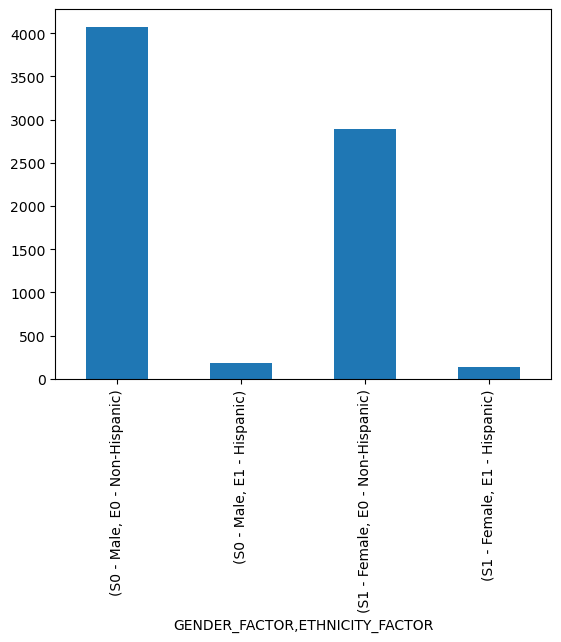

In [38]:
(milk_df_clean.groupby(['GENDER_FACTOR','ETHNICITY_FACTOR']).count()['RACE_FACTOR']).plot(kind="bar")

In [37]:
milk_df_clean['RACE_FACTOR'].unique()

array(['R0 - White', 'R1 - Black', 'R2 - Asian or Pacific Islander',
       'R4 - Unknown', 'R3 - Other'], dtype=object)

<AxesSubplot: xlabel='RACE_FACTOR'>

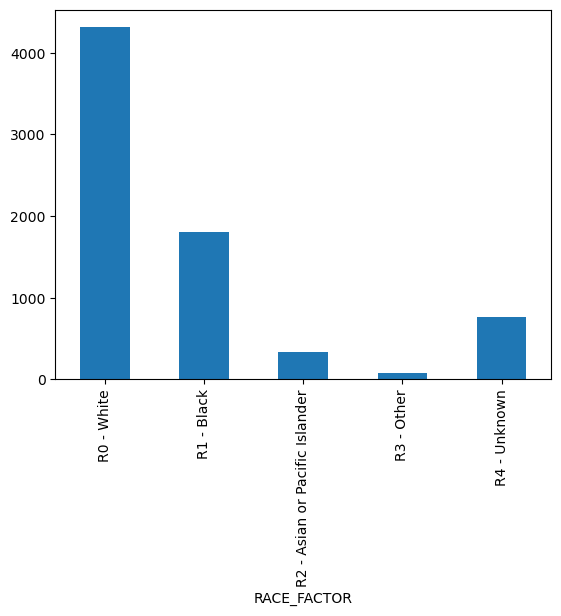

In [39]:
(milk_df_clean.groupby('RACE_FACTOR').count()['SUBJECT_ID']).plot(kind="bar")

In [40]:
milk_race_unknown = milk_df_clean.loc[milk_df_clean["RACE_FACTOR"] == "R4 - Unknown"]
milk_race_unknown

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,MILK_ALG_START,MILK_ALG_END
38,4422,1994,S0 - Male,R4 - Unknown,E1 - Hispanic,P1 - Medicaid,False,7.501711,16.202601,19.534565,NaN
39,4524,1996,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,False,5.316906,17.845311,6.606434,6.606434
44,4677,1997,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P1 - Medicaid,False,4.295688,9.086927,13.065024,NaN
45,4808,1996,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,False,5.180014,16.772074,12.410678,NaN
60,6523,1996,S0 - Male,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,False,5.023956,12.662560,9.963039,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7250,331947,2006,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.021903,7.129363,2.017796,NaN
7255,332164,2006,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P1 - Medicaid,False,0.427105,6.620123,1.456537,1.456537
7278,332771,2006,S1 - Female,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.019165,6.119097,1.015743,1.015743
7280,332843,2006,S0 - Male,R4 - Unknown,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.024641,7.055441,1.251198,1.251198
